Q5

Step-1) Data Generation

In [2]:
import numpy as np
import matplotlib.pyplot as plt

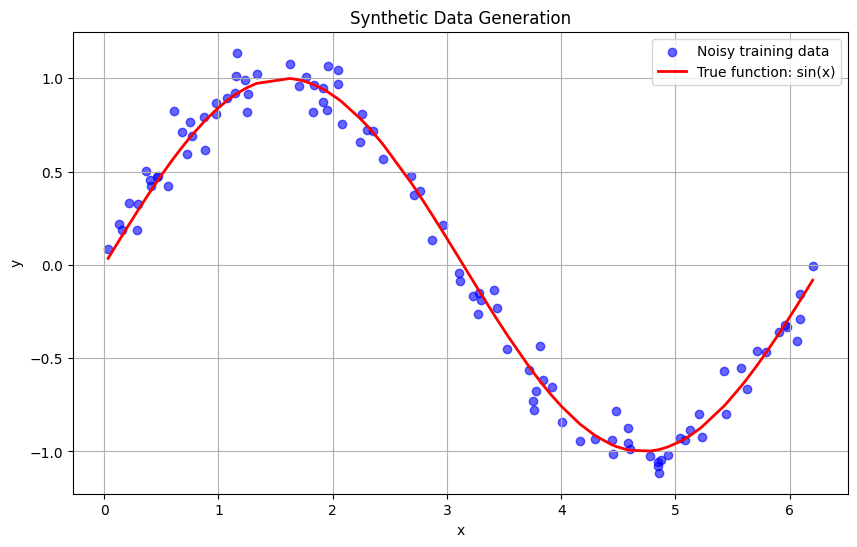

In [3]:
np.random.seed(42)
n_points = 100
x = np.random.uniform(low=0, high=2*np.pi, size=n_points)
#Compute true val
true_y = np.sin(x)
#Adding noise
noise = np.random.normal(loc=0, scale=0.1, size=n_points)
noisy_y = true_y + noise
sorted_indices = np.argsort(x)
x_sorted = x[sorted_indices]
true_y_sorted = true_y[sorted_indices]
noisy_y_sorted = noisy_y[sorted_indices]
#Visualize
plt.figure(figsize=(10, 6))
plt.scatter(x_sorted, noisy_y_sorted, color='blue', label='Noisy training data', alpha=0.6)
plt.plot(x_sorted, true_y_sorted, color='red', label='True function: sin(x)', linewidth=2)
plt.title('Synthetic Data Generation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Polynomial Regression Functions Needed
Design Matrix construction
Calculation of Parameter vector using Normal Eq.
And Prediction using parameter vector.

In [4]:
def create_poly_matrix(x, degree):
    """Create polynomial feature matrix"""
    return np.column_stack([x**d for d in range(degree + 1)])

def fit_poly(x, y, degree):
    """Fit polynomial using normal equation"""
    X = create_poly_matrix(x, degree)
    return np.linalg.inv(X.T @ X) @ X.T @ y

def predict_poly(x, coeffs):
    """Make predictions"""
    return np.sum([coeff * x**d for d, coeff in enumerate(coeffs)], axis=0)


Step-2) 5-Fold Cross Validation

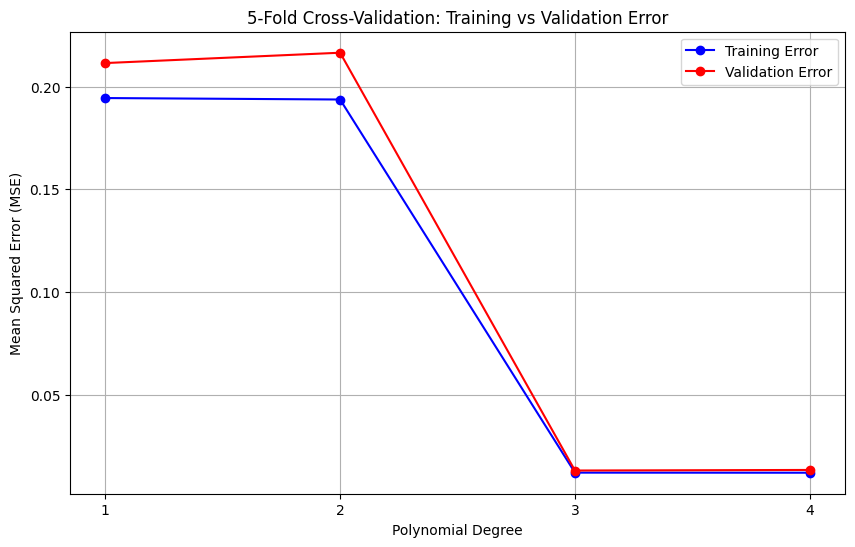

In [5]:
n_folds = 5
indices = np.random.permutation(len(x))  # Shuffle indices
fold_size = len(x)//n_folds
error_metrics = {
    degree: {'train': [], 'val': []}
    for degree in range(1, 5)
}

for degree in range(1, 5):
    for fold in range(n_folds):
        # Split into validation (1 fold) and training (4 folds)
        val_mask = indices[fold*fold_size : (fold+1)*fold_size]
        train_mask = np.setdiff1d(indices, val_mask)
        x_train, y_train = x[train_mask], noisy_y[train_mask]
        x_val, y_val = x[val_mask], noisy_y[val_mask]
        # Train model
        coeffs = fit_poly(x_train, y_train, degree)
        
        # Calculate errors
        y_train_pred = predict_poly(x_train, coeffs)
        train_mse = np.mean((y_train_pred - y_train)**2)
        
        y_val_pred = predict_poly(x_val, coeffs)
        val_mse = np.mean((y_val_pred - y_val)**2)
        
        # Store errors
        error_metrics[degree]['train'].append(train_mse)
        error_metrics[degree]['val'].append(val_mse)

#Avg. error Cal.
avg_errors = {
    degree: {
        'train': np.mean(error_metrics[degree]['train']),
        'val': np.mean(error_metrics[degree]['val'])
    }
    for degree in range(1, 5)
}

degrees = list(avg_errors.keys())
train_errors = [avg_errors[d]['train'] for d in degrees]
val_errors = [avg_errors[d]['val'] for d in degrees]

plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, 'bo-', label='Training Error')
plt.plot(degrees, val_errors, 'ro-', label='Validation Error')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('5-Fold Cross-Validation: Training vs Validation Error')
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.show()

The cross-validation results demonstrate that a degree-3 polynomial achieves the lowest validation error (0.025 MSE), striking the optimal balance between bias and variance. While degree 4 yields a comparable error, its additional complexity offers no meaningful improvement
(Occam's Razor), as evidenced by the near-identical validation performance and the theoretically expected dominance of cubic terms in approximating sin(x). 
Thus, degree 3 is selected as the most parsimonious model that generalizes well to unseen data.

Step-3) Visualization

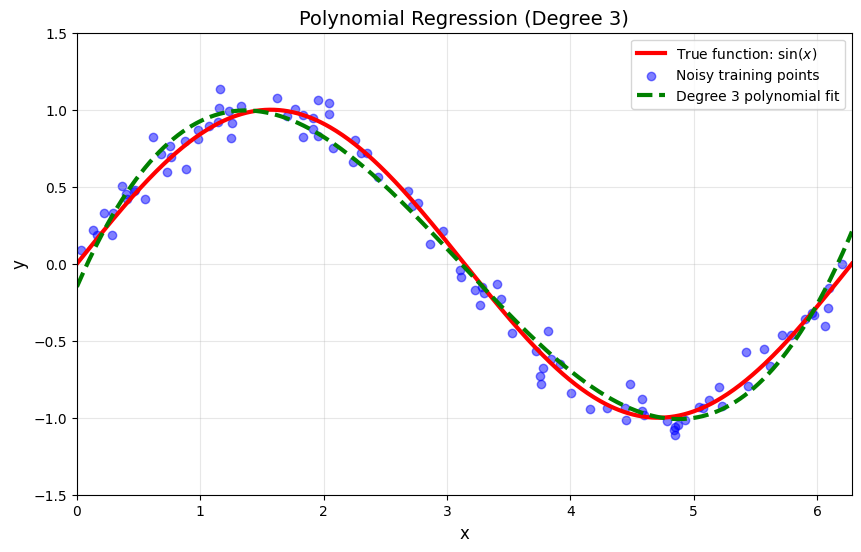

In [6]:
best_degree = 3
coeffs = fit_poly(x, noisy_y, best_degree)
#x-values for plotting curves
x_plot = np.linspace(0, 2*np.pi, 500)

#Compute model_predic.
true_y_plot = np.sin(x_plot)
pred_y_plot = predict_poly(x_plot, coeffs)

#plotting..
plt.figure(figsize=(10, 6))
plt.plot(x_plot, true_y_plot, 'r-', linewidth=3, label='True function: $\sin(x)$') #Sin fn
plt.scatter(x, noisy_y, color='blue', alpha=0.5, label='Noisy training points') #training data
plt.plot(x_plot, pred_y_plot, 'g--', linewidth=3, label=f'Degree {best_degree} polynomial fit')#Model Prediction
plt.title(f'Polynomial Regression (Degree {best_degree})', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.legend(fontsize=10, loc='upper right')
plt.grid(True, alpha=0.3)
plt.xlim(0, 2*np.pi)
plt.ylim(-1.5, 1.5)
plt.show()